### Questions
* Distribution functions - when to use cdf or pdf

### Objectives
YWBAT 
* Solve problems using poisson distributions
* Solve problems using geometric distributions
* Explain how the central limit theorem is applied to make claims on a population

### Outline
* Questions
* Breakout rooms and solve some problems
* Discuss the CLT
* Wrap Up

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Breakout Room 1

When do we use Poisson distributions?

Probability of events happening over a given time.  We have some rate of events over time.

### Poisson distribution problems
The Hulk smashes 17 items on average during a 6 minute time period.

a) Calculate the probability that Hulk smashes 10 items in 6 minutes.

b) Calculate the probability that Hulk smashes at least 1 item in 3 minutes.

c) During a ten minute period, what is the probability that exactly 15 items are smashed?

----------------
<details>
    <summary>Solutions Here</summary>
    
    a) $$p = \frac{\lambda^x \times e^{-\lambda}}{x!} = \frac{\frac{17}{6}^x \times e^{-\frac{17}{6}}}{x!}$$
    
    Plug in 10 for x
       
       $$p = \frac{\frac{17}{6}^{10} \times e^{-\frac{17}{6}}}{10!}$$
       
       calculate 
       $$p = 0.0054 = 0.54\%$$
            
     b) (CDF) Start by converting lambda to match our time interval
    
        $$p = \frac{\frac{8.5}{3}^x \times e^{-\frac{8.5}{3}}}{x!}$$
        
    Plug in 1 for x
        
        $$p = \frac{\frac{17}{6}^1 \times e^{-\frac{17}{6}}}{1!}$$
    
    Calculate
    
        $$ p = 16.67\%$$
    
    c) Left as an exercise for the reader
    
</details>

In [3]:
lambd = 17/6 # 17 items in 6 minutes
x = 10
def poisson(lambd, x):
    num = lambd**x * np.exp(-lambd)
    den = np.math.factorial(x)
    return num/den

poisson(lambd, x)

0.0005403966461534441

(array([14.,  0., 32.,  0., 54.,  0., 41.,  0., 32.,  0., 10.,  0., 15.,
         0.,  2.]),
 array([0.        , 0.46666667, 0.93333333, 1.4       , 1.86666667,
        2.33333333, 2.8       , 3.26666667, 3.73333333, 4.2       ,
        4.66666667, 5.13333333, 5.6       , 6.06666667, 6.53333333,
        7.        ]),
 <a list of 15 Patch objects>)

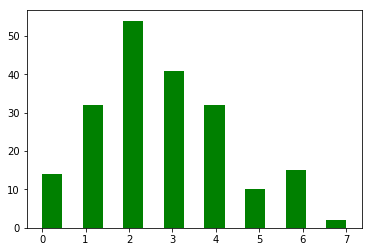

In [17]:
x = np.random.poisson(17/6, 200)
plt.hist(x, bins=15, color='g')

In [19]:
# P(1) + P(2) + ... + P(k) + ...
# P(0)
1 - poisson(lambd=8.5/3, x=0)

0.9411835283575701

In [20]:
# 6 * 5/3 = 10
lambd_10 = (17*(5/3))/10
lambd_10

2.8333333333333335

In [21]:
poisson(lambd_10, 15)

2.7381953066990834e-07

# Breakout Room 2

We use binomial when we want to determine successes and failures over n trials

### Binomial/Geometric distribution problems
Assume that 12% of the population pours their cereal on their milk. We choose 11 people at random.

a) What is the probability that the first person who pours milk on their cereal is the 4th person chosen?

b) What is the probability that the first person who pours milk on their cereal is the 4th or 5th person chosen?

c) There are exactly 5 people who pour their cereal on their milk in the group?

----------------------

<details>
    <summary>Solutions Here</summary>
    
    a) $$ p = 0.12^3 \times 0.88 = 0.0015 = .15\% $$
    
    b) $$ p = p(4) + p(5) = 0.12^3 \times 0.88 + 0.12^4 \times 0.88 = 0.0017 = 0.17\% $$
    
    c) $$ p = {11 \choose 8} 0.12^5 \times 0.88^6 = 0.0020 = 0.20\%$$
    
</details>

In [23]:
0.12**3 * 0.88

0.0015206399999999998

In [ ]:
# P(event)^(k-1) * (1 - P(event))
0.12**3 # what is the probability of picking 3 milk first people in a row

In [ ]:
# P(4) + P(5)

In [24]:
(0.12**3 * 0.88) + (0.12**4 * 0.88)

0.0017031167999999998

In [26]:
def choose(n, k):
    num = np.math.factorial(n)
    den = np.math.factorial(k) * np.math.factorial(n-k)
    return num/den

In [28]:
choose(11, 5)*(0.12**5)*(0.88**6)

0.005338807214785796

### What isn't the central limit theorem?
* the sample population is normal
* the population is normal


### What does the central limit theorem state? 
A sample distribution will be similar to the population distribution

The sample statistics are normally distributed

In [34]:
# Here's a population of 10,000 people between the ages of 10 and 60
population = np.random.randint(10, 60, 10000)

# this is the mean of the population
pop_mean = population.mean()
pop_mean, population.std()

(34.7614, 14.472714674172222)

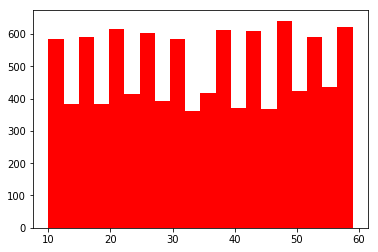

In [35]:
plt.hist(population, color='r', bins=20)
plt.show()

In [37]:
# Let's do some sampling and see if we can get to the mean
samp_means = []
samp_stds = []
for i in range(200):
    sample = np.random.choice(population, size=30, replace=False)
    samp_means.append(sample.mean())
    samp_stds.append(sample.std())
np.mean(samp_means), np.mean(samp_stds)

(34.57866666666667, 14.256759108213487)

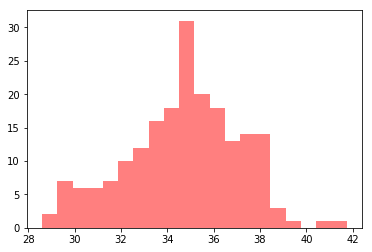

In [32]:
plt.hist(samp_means, bins=20, color='r', alpha=0.5)
plt.show()

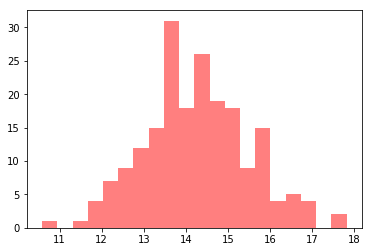

In [38]:
plt.hist(samp_stds, bins=20, color='r', alpha=0.5)
plt.show()

In [36]:
np.std(samp_means, ddof=1)

2.4519008396602264

### Assessment